# Importações e Configurações

In [30]:
import os
from os import listdir
import pandas as pd
import glob
import seaborn as sns
from querido_diario_toolbox import Gazette
from querido_diario_toolbox.etl.text_extractor import create_text_extractor
config = {"apache_tika_jar": "tika-app-1.24.1.jar"}
extrator = create_text_extractor(config)

# Extraindo .txt e metadados de todos os PDFs

In [21]:
# Extraindo .txt

for file in glob.glob(os.path.join('data/pdf', '*.pdf')):
    with open(filepath) as f:
        diario = Gazette(filepath=file)
        extrator.extract_text(diario)

In [6]:
# Extraindo metadados

for file in glob.glob(os.path.join('data/pdf', '*.pdf')):
    with open(file) as f:
        diario = Gazette(filepath=file)
        extrator.extract_metadata(diario)

# Encontrando Palavras Chaves

In [24]:
with open ('log.csv', 'w') as csv:
    csv.write('filename,data,numero_de_paginas,remedio\n')
    for filename in listdir("data/txt/"):
        with open('./data/txt/' + filename) as currentFile:
            text = currentFile.read().upper()
            if 'IVERMECTINA' in text:
                with open('data/metadados/' + filename[:-4] + '.json') as json:
                    text = json.read()
                    csv.write(filename + ',' + text[764:774] + ',' + text[-4:-1] + ',' +'ivermectina\n')
                    
with open ('log.csv', 'a') as csv:
    for filename in listdir("data/txt/"):
        with open('./data/txt/' + filename) as currentFile:
            text = currentFile.read().upper()
            if 'CLOROQUINA' in text:
                with open('data/metadados/' + filename[:-4] + '.json') as json:
                    text = json.read()
                    csv.write(filename + ',' + text[764:774] + ',' + text[-4:-2] + ',' + 'cloroquina\n')
                    
with open ('log.csv', 'a') as csv:
    for filename in listdir("data/txt/"):
        with open('./data/txt/' + filename) as currentFile:
            text = currentFile.read().upper()
            if 'HIDROXICLOROQUINA' in text:
                with open('data/metadados/' + filename[:-4] + '.json') as json:
                    text = json.read()
                    csv.write(filename + ',' + text[764:774] + ',' + text[-4:-2] + ',' + 'hidroxicloroquina\n')
                    
with open ('log.csv', 'a') as csv:
    for filename in listdir("data/txt/"):
        with open('./data/txt/' + filename) as currentFile:
            text = currentFile.read().upper()
            if 'AZITROMICINA' in text:
                with open('data/metadados/' + filename[:-4] + '.json') as json:
                    text = json.read()
                    csv.write(filename + ',' + text[764:774] + ',' + text[-4:-2] + ',' + 'azitromicina\n')

# Limpeza dos Dados

In [27]:
# Observe no arquivo log.csv que a coluna numero_de_paginas está com aspas duplas em algumas colunas
df = pd.read_csv('log.csv')
df

,filename,data,numero_de_paginas,remedio
0,ac31977044429805a0890d3ca5201c977c34da26.txt,2021-03-24,6,ivermectina
1,01d1497fc1495386ca18321c12da47987c565c46.txt,2021-03-17,"22""",ivermectina
2,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,"16""",ivermectina
3,58dc77d00476c8c637c22e36b831ebd9ece8d5d3.txt,2021-02-04,"13""",ivermectina
4,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,16,cloroquina
5,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,16,hidroxicloroquina
6,69f549f8877a49f378cd03b0fd6ed240f15ef2c7.txt,2020-07-27,11,azitromicina
7,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,16,azitromicina


In [29]:
df['numero_de_paginas'] = df['numero_de_paginas'].str.replace('"', '')
df

,filename,data,numero_de_paginas,remedio
0,ac31977044429805a0890d3ca5201c977c34da26.txt,2021-03-24,6,ivermectina
1,01d1497fc1495386ca18321c12da47987c565c46.txt,2021-03-17,22,ivermectina
2,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,16,ivermectina
3,58dc77d00476c8c637c22e36b831ebd9ece8d5d3.txt,2021-02-04,13,ivermectina
4,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,16,cloroquina
5,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,16,hidroxicloroquina
6,69f549f8877a49f378cd03b0fd6ed240f15ef2c7.txt,2020-07-27,11,azitromicina
7,5edd79c785aee1fab5cd91c291dd4be26d239126.txt,2020-07-31,16,azitromicina


# Visualização dos Dados

[Text(0, 0, '4'), Text(0, 0, '1'), Text(0, 0, '1'), Text(0, 0, '2')]

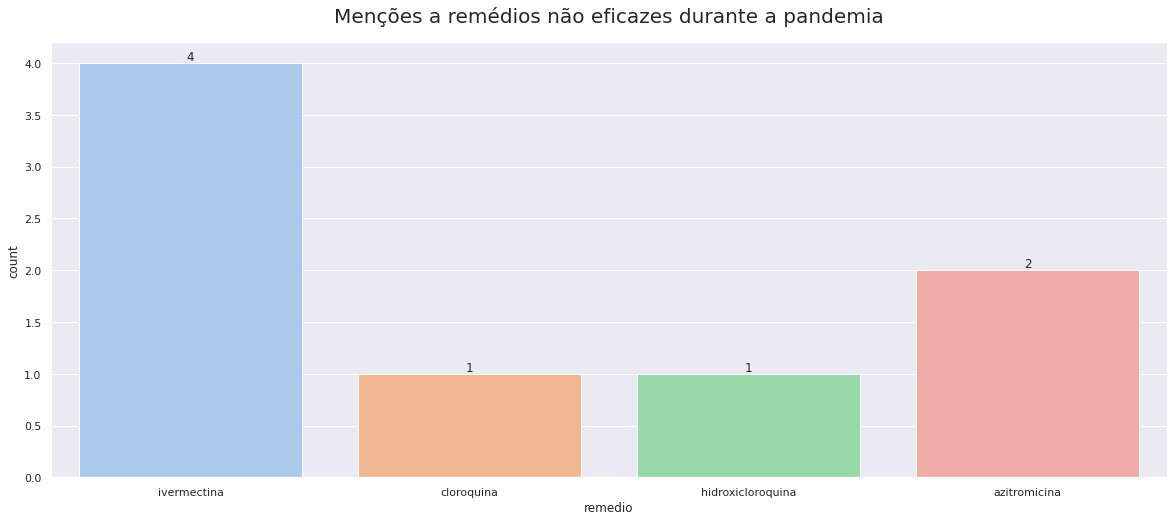

In [39]:
# Quantas vezes cada medicamente não eficaz aparece em diários oficiais?
sns.set_theme(style = 'whitegrid')
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(x = 'remedio', data = df, palette = 'pastel')
ax.set_title('Menções a remédios não eficazes durante a pandemia', fontsize=20, pad=20)
ax.bar_label(ax.containers[0])